# Project: Setiment Analysis for Women's Clothing E-Commerce

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

In [1]:
# Load in packages

# data processing
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<a id='wrangling'></a>
## Data Wrangling

### Check General Properties

In [9]:
# Read and Check the Data
df = pd.read_csv("../input/Womens Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [27]:
df.shape

(23486, 10)

In [28]:
#Check the data type of each column and whether they have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [10]:
# Change the column names to single words
type(df.columns)
column_names = []
for i in range(df.shape[1]):
    column_names.append(df.columns[i].strip().replace(" ","_")) 
df.columns = column_names
df.head(1)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


In [11]:
# Check whether the dataset contains duplicates
df.duplicated().sum()

21

In [12]:
df[df.duplicated()]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
493,1104,39,NaN,NaN,5,1,0,General,Dresses,Dresses
2959,1094,30,NaN,NaN,5,1,0,General,Dresses,Dresses
4850,829,66,NaN,NaN,5,1,0,General Petite,Tops,Blouses
5671,861,34,NaN,NaN,5,1,0,General,Tops,Knits
5776,868,61,NaN,NaN,5,1,0,General,Tops,Knits
9306,834,70,NaN,NaN,5,1,0,General Petite,Tops,Blouses
9413,1094,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
9430,1094,36,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
10787,1078,35,NaN,NaN,5,1,0,General,Dresses,Dresses
14129,862,38,NaN,NaN,5,1,0,General Petite,Tops,Knits


Notice that there are duplicated rows. But since there is no reviewer information in this dataset, it is difficult to judge whether these reviews are real duplicates of review or they are just from different reviewers but the reviewers have the same age and leaving no title and review text for these items. Since my goal is to analyze the Review Text, these duplicates are not informative due to lack of Review text. One exception is the item with index 21888, which does have a review text. This one may be a real duplicate.

In [39]:
df_1022 = df[df['Clothing ID'] == 1022]
df_1022[df_1022['Age']==37]


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1400,1022,37,Love these jeans!,"Great fit, perfect length! so happy with these...",5,1,3,General,Bottoms,Jeans
9447,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans
9722,1022,37,Classic ag greatness,These are awesome! classic style and quality y...,5,1,0,General,Bottoms,Jeans
9957,1022,37,NaN,NaN,5,1,0,General,Bottoms,Jeans
11429,1022,37,Unique style,"These are nice cords, albeit they look slightl...",4,1,1,General,Bottoms,Jeans
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


### Cleaning

In [13]:
# remove duplicates
df = df.drop_duplicates()

In [15]:
# remove nulls 
df = df[df['Review_Text'].isnull() == False]

In [10]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
Clothing_ID                22640 non-null int64
Age                        22640 non-null int64
Title                      19675 non-null object
Review_Text                22640 non-null object
Rating                     22640 non-null int64
Recommended_IND            22640 non-null int64
Positive_Feedback_Count    22640 non-null int64
Division_Name              22627 non-null object
Department_Name            22627 non-null object
Class_Name                 22627 non-null object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [45]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22640.000000,22640.000000,22640.000000,22640.000000,22640.000000
mean,919.327827,43.280654,4.183525,0.818860,2.630698
std,202.270191,12.327181,1.115774,0.385142,5.786265
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [73]:
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T    

Column,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
Unique,1179,77,13993,22634,5,2,82,4,7,21
Missing,0,0,2965,0,0,0,0,13,13,13


<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Distribution

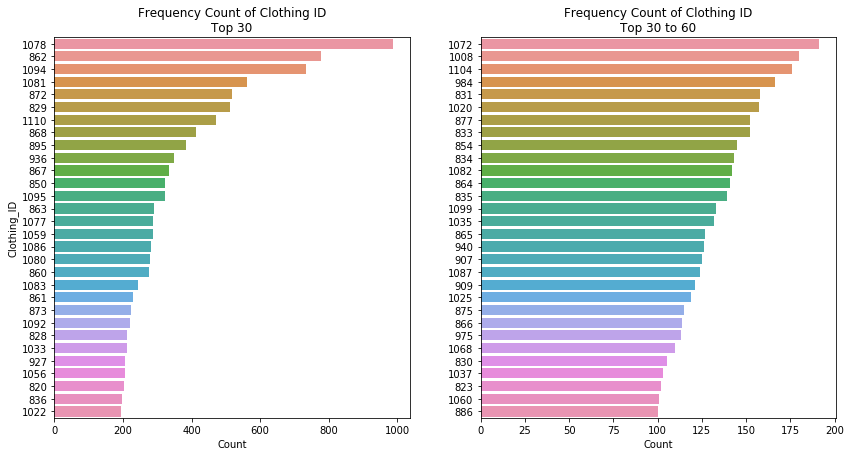

Dataframe Dimension: 22640 Rows
(1179,)
1205
17473


In [80]:
# Clothing ID
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing_ID", data = df[df["Clothing_ID"].isin(df["Clothing_ID"].value_counts()[:num].index)],
              order= df["Clothing_ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing_ID", data = df[df["Clothing_ID"].isin(df["Clothing_ID"].value_counts()[num:60].index)],
              order= df["Clothing_ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(df.shape[0]))
print(df["Clothing_ID"].value_counts().shape)
print(df["Clothing_ID"].max())
print(np.sum(df["Clothing_ID"].value_counts()[:100]))


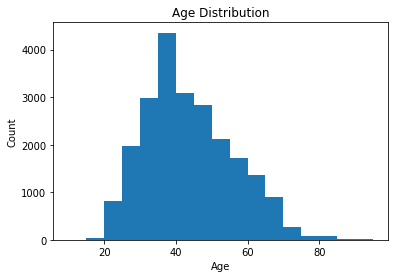

In [16]:
# Check the age distribution
# ax = sns.distplot(df.Age)
# ax.set_title("Age Distribution")
# ax.set_ylabel("Density");
plt.hist(df.Age, bins = range(10,100,5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count");

In [34]:
# Check the rating distribution
np.min(df.Rating)
count_rating = []
for i in range(1,6):
    count_rating.append((df['Rating']== i).sum())
print("Positive Ratings (Rating >= 3): {0:.2f} %".format(df.query("Rating >= 3").count()[0]/df.shape[0] * 100) )   

Positive Ratings (Rating >= 3): 89.53 %


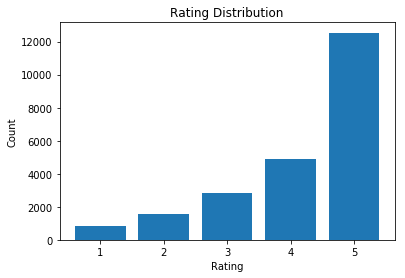

In [77]:
plt.bar(range(1,6), count_rating, align='center')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count");

In [33]:
# Check the distribution of Recommended IND 
np.min(df['Recommended_IND'])
count_recommend = []
for i in range(2):
    count_recommend.append((df['Recommended_IND']== i).sum())
print("Percentage of Recommended IND: {0:.2f}%".format(df.query("Recommended_IND == 1").count()[0]/df.shape[0]*100) )   

Percentage of Recommended IND: 81.89%


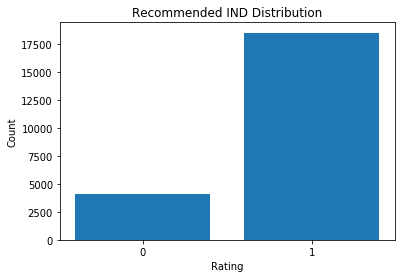

In [29]:
plt.bar(range(2), count_recommend, tick_label = [0,1])
plt.title("Recommended IND Distribution")
plt.xlabel("Rating")
plt.ylabel("Count");

/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Log Positive Feedback Count')

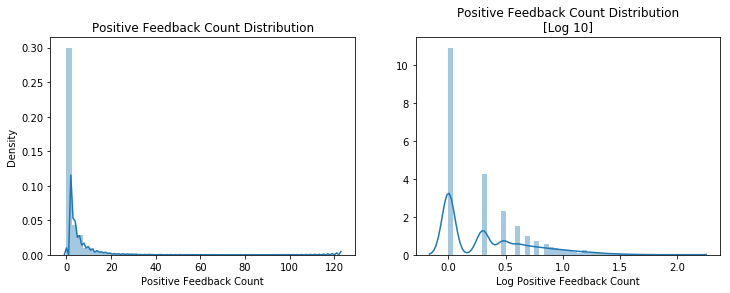

In [89]:
f, ax = plt.subplots(1,2,figsize=(12,4), sharey=False)
sns.distplot(df["Positive Feedback Count"], ax=ax[0])
ax[0].set_title("Positive Feedback Count Distribution")
ax[0].set_ylabel("Density")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+1)), ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[1].set_xlabel("Log Positive Feedback Count")


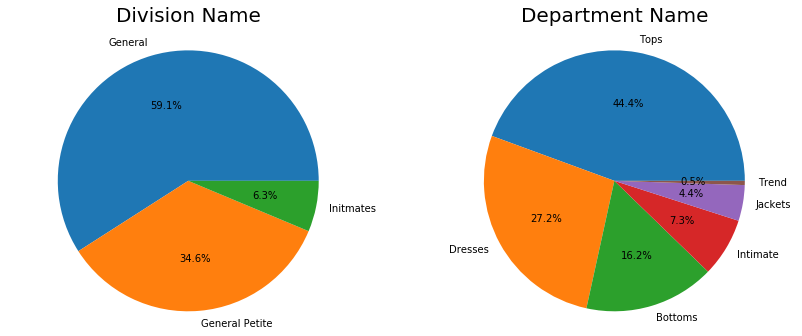

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4), sharey=True)
ax1.axis('equal')
ax1.pie(df["Division_Name"].value_counts(), labels = df["Division_Name"].value_counts().index, radius = 1.5, autopct = '%0.1f%%')
ax1.set_title("Division Name", fontdict={'fontsize': 20}, pad = 50)
ax2.axis('equal')
ax2.pie(df["Department_Name"].value_counts(), labels= df["Department_Name"].value_counts().index, radius = 1.5, autopct='%0.1f%%')
ax2.set_title("Department Name", fontdict = {'fontsize': 20}, pad = 50)
plt.show()

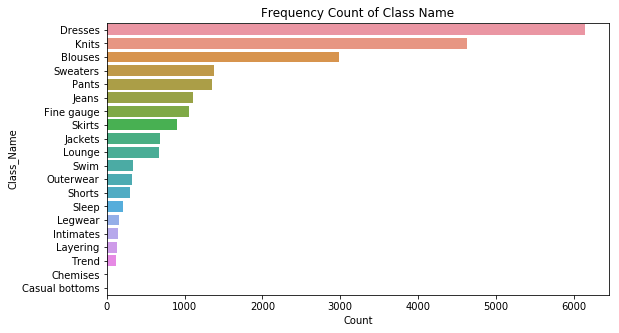

In [68]:
# Class Name
plt.subplots(figsize=(9,5))
sns.countplot(y="Class_Name", data=df,order=df["Class_Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

## Text Processing

### Text Processing

In [17]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#nltk.download()
ps = PorterStemmer()

reviews = df['Review_Text'].astype(str)
reviews

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
8        I love this dress. i usually get an xs but it ...
9        I'm 5"5' and 125 lbs. i ordered the s petite t...
10       Dress runs small esp where the zipper area run...
11       This dress is perfection! so pretty and flatte...
12       More and more i find myself reliant on the rev...
13       Bought the black xs to go under the larkspur m...
14       This is a nice choice for holiday gatherings. ...
15       I took these out of the package and wanted the...
16       Material and color is nice.  the leg opening i.

In [19]:
reviews.shape

(22640,)

In [20]:
print(reviews.shape)
reviews[reviews.isnull()] = "NULL"

(22640,)


In [21]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{3,}')
stop_words = set(stopwords.words('english'))
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [22]:
df['tokenized'] = df["Review_Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row

df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, ini..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti..."


In [23]:
#Convert the df["tokenized"] to string 
def string_unlist(strlist):
    return " ".join(strlist)

df["tokenized_unlist"] = df["tokenized"].apply(string_unlist)
df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized,tokenized_unlist
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, ini...",high hopes dress really wanted work initially ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti...",shirt flattering due adjustable front tie perf...


In [24]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
df['Polarity Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['pos'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [25]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'
df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, dress, really, wanted, work, ini...",high hopes dress really wanted work initially ...,0.8779,0.721,0.040,0.240,Positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,0.9464,0.185,0.171,0.644,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti...",shirt flattering due adjustable front tie perf...,0.9062,0.494,0.000,0.506,Positive


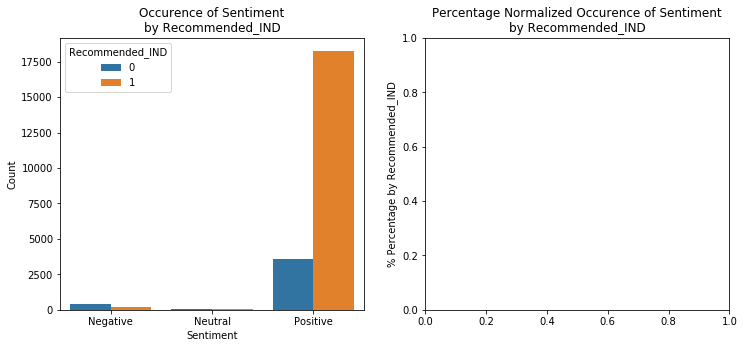

In [18]:
huevar = "Recommended_IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")

axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

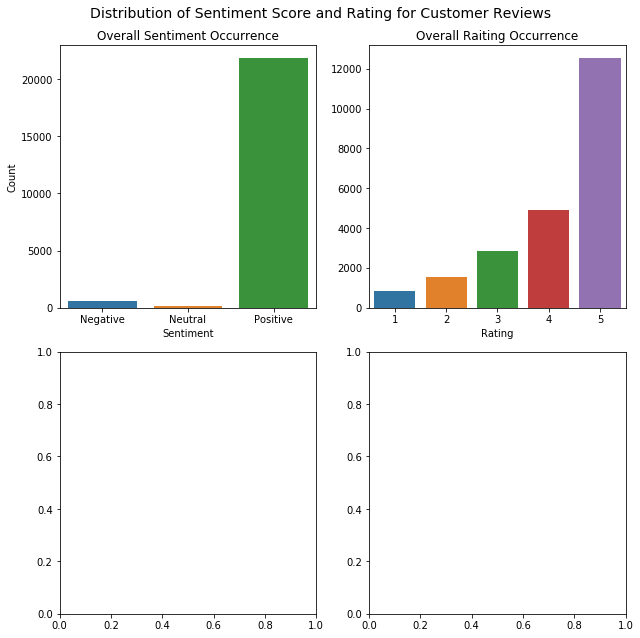

In [20]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

# percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
# axes[1,0].set_xlabel("Rating")
# axes[1,0].set_ylabel("Percentage %")
# axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

# percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
# axes[1,1].set_ylabel("Occurrence Frequency")
# axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
# axes[1,1].set_xlabel("Sentiment")
# axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()


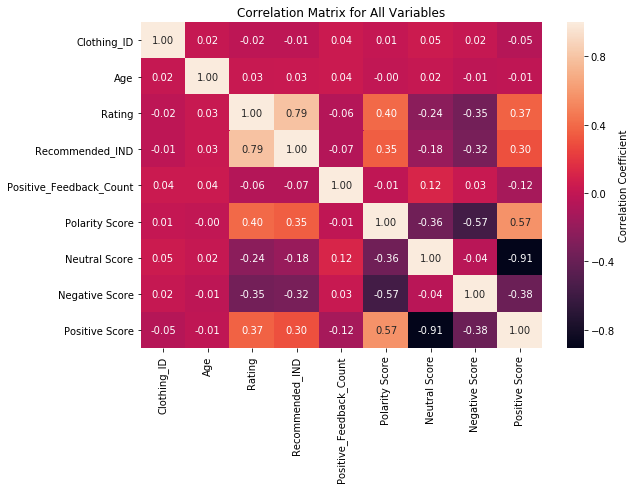

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


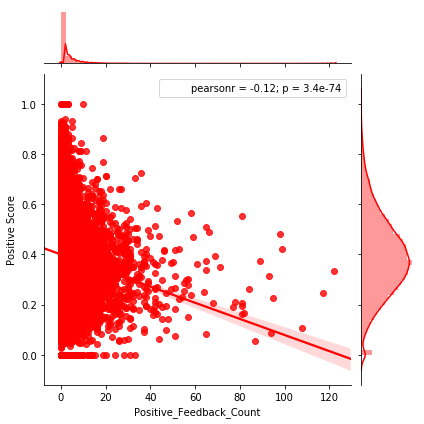

In [21]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()

# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive_Feedback_Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()



In [22]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

### Visualize Titles

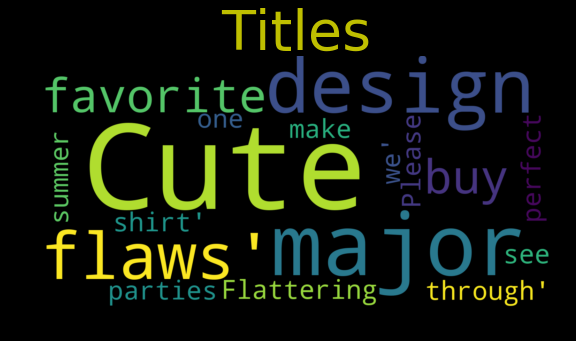

In [23]:

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

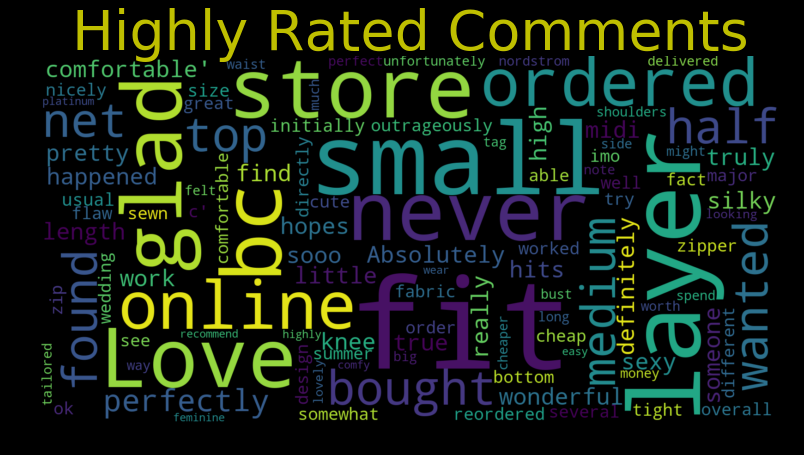

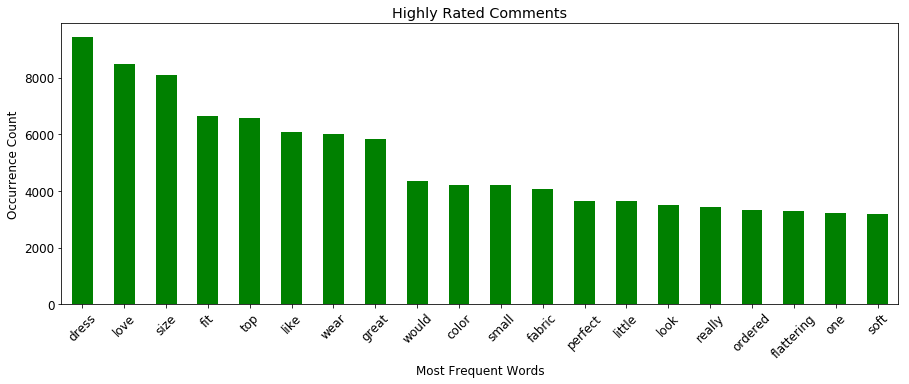

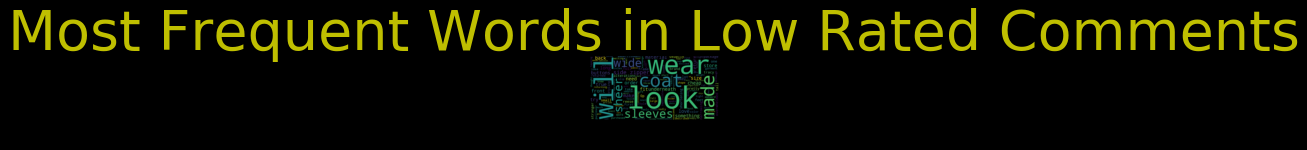

In [24]:
# Highly Raited
title ="Highly Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

In [27]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review_Text']
y=rating_class['Rating']

In [28]:
df.shape

(19662, 17)

In [29]:
rating_class

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,0.9464,0.185,0.171,0.644,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, ti...",shirt flattering due adjustable front tie perf...,0.9062,0.494,0.000,0.506,Positive
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[aded, basket, hte, last, mintue, see, would, ...",aded basket hte last mintue see would look lik...,0.6361,0.824,0.049,0.127,Positive
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,"[love, dress, usually, get, runs, little, snug...",love dress usually get runs little snug bust o...,0.7579,0.683,0.000,0.317,Positive
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,"[lbs, ordered, petite, make, sure, length, lon...",lbs ordered petite make sure length long typic...,0.9643,0.554,0.000,0.446,Positive
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,"[find, reliant, reviews, written, savvy, shopp...",find reliant reviews written savvy shoppers pa...,0.5106,0.795,0.055,0.150,Positive
13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,1,0,Initmates,Intimate,Intimates,"[bought, black, larkspur, midi, dress, bother,...",bought black larkspur midi dress bother lining...,0.5423,0.663,0.122,0.215,Positive
17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses,"[took, chance, blouse, glad, crazy, blouse, ph...",took chance blouse glad crazy blouse photograp...,0.9460,0.397,0.121,0.481,Positive
18,1120,32,Super cute and cozy,"A flattering, super cozy coat. will work well...",5,1,0,General,Jackets,Outerwear,"[flattering, super, cozy, coat, work, well, co...",flattering super cozy coat work well cold dry ...,0.9360,0.440,0.000,0.560,Positive
19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,1,0,General,Dresses,Dresses,"[love, look, feel, tulle, dress, looking, some...",love look feel tulle dress looking something d...,0.9477,0.545,0.000,0.455,Positive


In [31]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [33]:
print(len(bow_transformer.vocabulary_))

13953


In [34]:
X_review = bow_transformer.transform(X_review)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
predict=nb.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  65  134]
 [  14 3252]]


             precision    recall  f1-score   support

          1       0.82      0.33      0.47       199
          5       0.96      1.00      0.98      3266

avg / total       0.95      0.96      0.95      3465



In [40]:
rating_positive=df['Review_Text'][3]
rating_positive

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [41]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5

In [43]:
X_predict_recommend=df['Review_Text']
y_recommend=df['Recommended_IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 588  448]
 [ 247 4616]]


             precision    recall  f1-score   support

          0       0.70      0.57      0.63      1036
          1       0.91      0.95      0.93      4863

avg / total       0.88      0.88      0.88      5899

